# Noise experiments

In [204]:
import numpy as np
import mnist
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gaussian import gaussian
from cnn_parallell import make_t_sne, experiment1, experiment2, experiment3, experiment4, experiment6
import multiprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from cnn_score import score_clfs_noisy


In [26]:
plt.rcParams["figure.figsize"] = (4,3)


In [159]:
TRAIN_SIZE = 5000

imgs = mnist.train_images()/255.0
labels = mnist.train_labels()
data_train = imgs[0:TRAIN_SIZE, 1:, 1:]
labels_train = labels[0:TRAIN_SIZE]
mnist_copy = data_train.copy()

noises = [.1, .2, .3, .4, .5]

noisy_mnists = [np.array([img + np.random.normal(.0, noise, size=(data_train[0].shape)) for img in mnist_copy]) for noise in noises]
noisy_mnists_flattened = [data.reshape(TRAIN_SIZE, 27*27) for data in noisy_mnists]

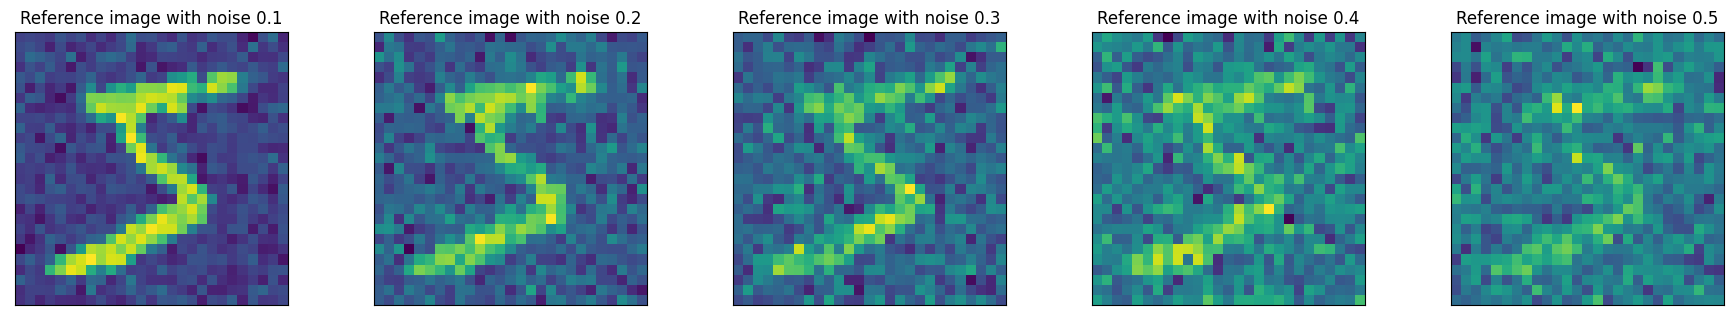

In [31]:
fig, ax = plt.subplots(1, 5, figsize=(18, 3))
for i in range(5): 
    ax[i].imshow(noisy_mnists[i][0])
    ax[i].set_xticks(())
    ax[i].set_yticks(())
    ax[i].set_title(f"Reference image with noise {noises[i]}")
plt.tight_layout(pad=0.0)


## Comparing performance on noisy mnist

In [79]:
lr_best_tols = {
    "baseline": 0.01,
    "exp1": 0.001,
    "exp2": 0.001,
    "exp3": 0.0005,
    "exp4": 0.0005,
    "exp5": 0.001,
    "exp6": 0.005
}

scores_noisy_lr = []

In [57]:
transformed_flat_dataset = [train_test_split(noisy_mnist_data, 
                                             labels_train,
                                             test_size=0.25,
                                             random_state=0) for noisy_mnist_data in noisy_mnists_flattened]

### Logistic regression

#### Baseline - LR

In [80]:
clfs_bl = [LogisticRegression(fit_intercept=True,
                           multi_class='multinomial',
                           penalty='l2',
                           solver='saga',
                           max_iter=1000,
                           n_jobs=8,
                           tol=lr_best_tols["baseline"]) for _ in range(len(noises))]

scores_noisy_lr.append(score_clfs_noisy(clfs_bl, transformed_flat_dataset))

#### Experiment 1 - LR

In [44]:
dataset_exp1 = [train_test_split(experiment1(noisy_mnist_data), 
                                 labels_train,
                                 test_size=0.25,
                                 random_state=0) for noisy_mnist_data in noisy_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [81]:
clfs_lr_ex1 = [LogisticRegression(fit_intercept=True,
                           multi_class='multinomial',
                           penalty='l2',
                           solver='saga',
                           max_iter=1000,
                           n_jobs=8,
                           tol=lr_best_tols["exp1"]) for _ in range(len(noises))]
                        
scores_noisy_lr.append(score_clfs_noisy(clfs_lr_ex1, dataset_exp1))

#### Experiment 2 - LR

In [47]:
dataset_exp2 = [train_test_split(experiment2(noisy_mnist_data), 
                                 labels_train,
                                 test_size=0.25,
                                 random_state=0) for noisy_mnist_data in noisy_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [82]:
clfs_lr_ex2 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp2"]) for _ in range(len(noises))]
                        
scores_noisy_lr.append(score_clfs_noisy(clfs_lr_ex2, dataset_exp2))

#### Experiment 3 - LR

In [50]:
dataset_exp3 = [train_test_split(experiment3(noisy_mnist_data), 
                                 labels_train,
                                 test_size=0.25,
                                 random_state=0) for noisy_mnist_data in noisy_mnists]

In [83]:
clfs_lr_ex3 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp3"]) for _ in range(len(noises))]

scores_noisy_lr.append(score_clfs_noisy(clfs_lr_ex3, dataset_exp3))

### Experiment 4 - LR

In [52]:
dataset_exp4 = [train_test_split(experiment4(noisy_mnist_data), 
                                 labels_train,
                                 test_size=0.25,
                                 random_state=0) for noisy_mnist_data in noisy_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [84]:
clfs_lr_ex4 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp4"]) for _ in range(len(noises))]

scores_noisy_lr.append(score_clfs_noisy(clfs_lr_ex4, dataset_exp4))

### Experiment 5 - LR

In [199]:
dataset_exp5 = [train_test_split(experiment4(noisy_mnist_data, length=4), 
                                 labels_train,
                                 test_size=0.25,
                                 random_state=0) for noisy_mnist_data in noisy_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [202]:
clfs_lr_ex5 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp5"]) for _ in range(len(noises))]

scores_noisy_lr.append(score_clfs_noisy(clfs_lr_ex5, dataset_exp5))

### Experiment 6 - LR

In [217]:
dataset_exp6 = [train_test_split(experiment6(noisy_mnist_data, threshhold=0.85), 
                                 labels_train,
                                 test_size=0.25,
                                 random_state=0) for noisy_mnist_data in noisy_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [218]:
clfs_lr_ex6 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp6"]) for _ in range(len(noises))]

scores_noisy_lr.append(score_clfs_noisy(clfs_lr_ex6, dataset_exp6))

### Results from LR

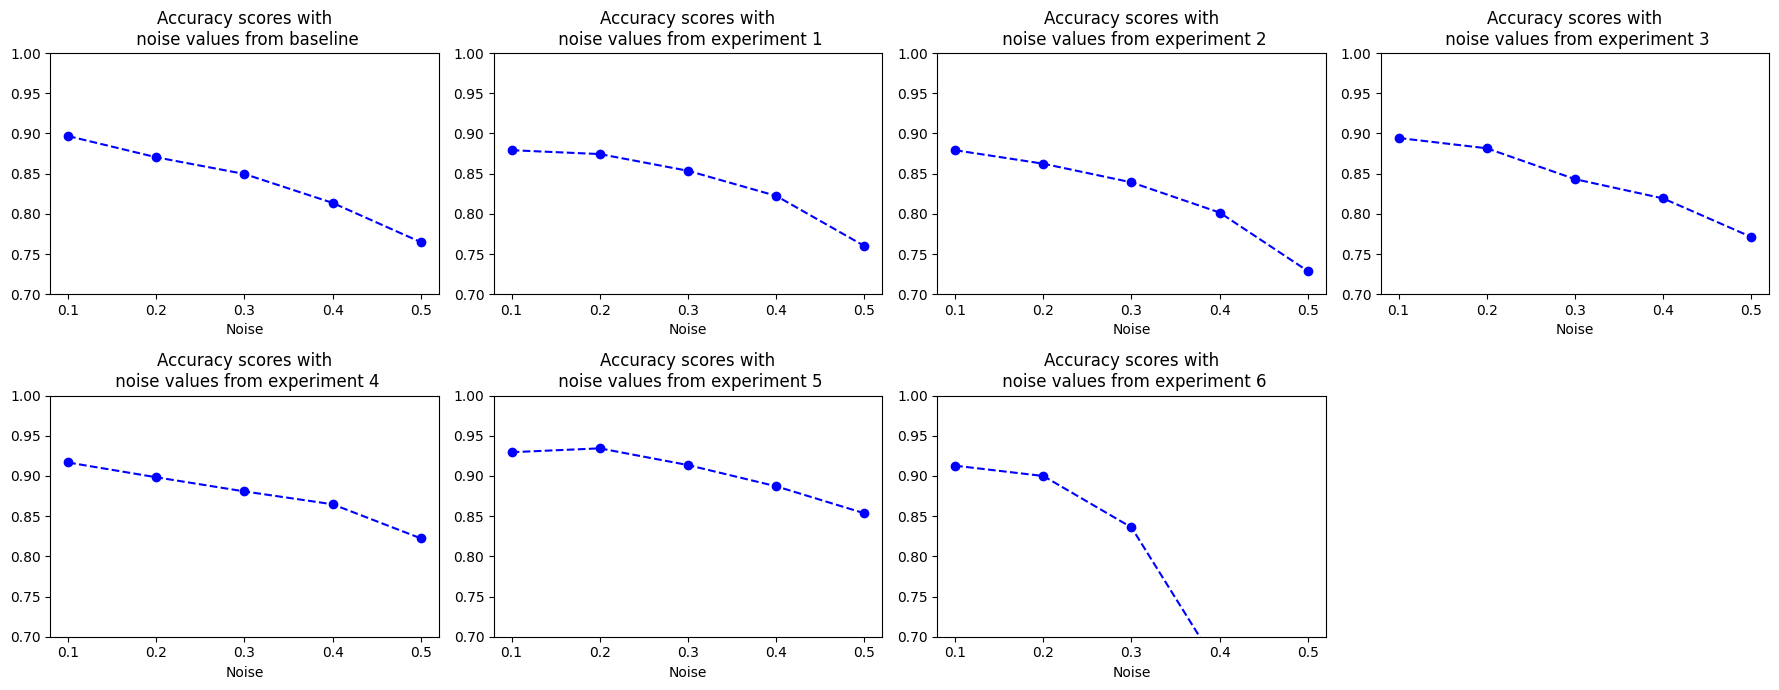

In [239]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(7):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in noises], scores_noisy_lr[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n noise values from experiment {i}" if i > 0 else "Accuracy scores with\n noise values from baseline")
    ax[k][j].set_ylim([.7, 1.])
    ax[k][j].set_xlabel("Noise") 
fig.tight_layout()
fig.delaxes(ax[1,3])

### SVM

In [93]:
svm_best_Cs = {
    "baseline": 10.,
    "exp1": 500.,
    "exp2": 500.,
    "exp3": 500.,
    "exp4": 500.,
    "exp5": 500.,
    "exp6": 10.
}

scores_noisy_svm = []

#### Baseline - SVM

In [94]:
clfs_svm_bl = [SVC(kernel='rbf', C=svm_best_Cs["baseline"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_bl, transformed_flat_dataset))

#### Experiment 1 - SVM

In [96]:
clfs_svm_exp1 = [SVC(kernel='rbf', C=svm_best_Cs["exp1"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_svm_exp1, dataset_exp1))

#### Experiment 2 - SVM

In [97]:
clfs_svm_exp2 = [SVC(kernel='rbf', C=svm_best_Cs["exp2"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_svm_exp2, dataset_exp2))

#### Experiment 3 - SVM

In [98]:
clfs_svm_exp3 = [SVC(kernel='rbf', C=svm_best_Cs["exp3"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_svm_exp3, dataset_exp3))

#### Experiment 4 - SVM

In [99]:
clfs_svm_exp4 = [SVC(kernel='rbf', C=svm_best_Cs["exp4"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_svm_exp4, dataset_exp4))

#### Experiment 5 - SVM

In [241]:
clfs_svm_exp5 = [SVC(kernel='rbf', C=svm_best_Cs["exp5"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_svm_exp5, dataset_exp5))

#### Experiment 6 - SVM

In [242]:
clfs_svm_exp6 = [SVC(kernel='rbf', C=svm_best_Cs["exp6"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_svm_exp6, dataset_exp6))

### Results from SVM

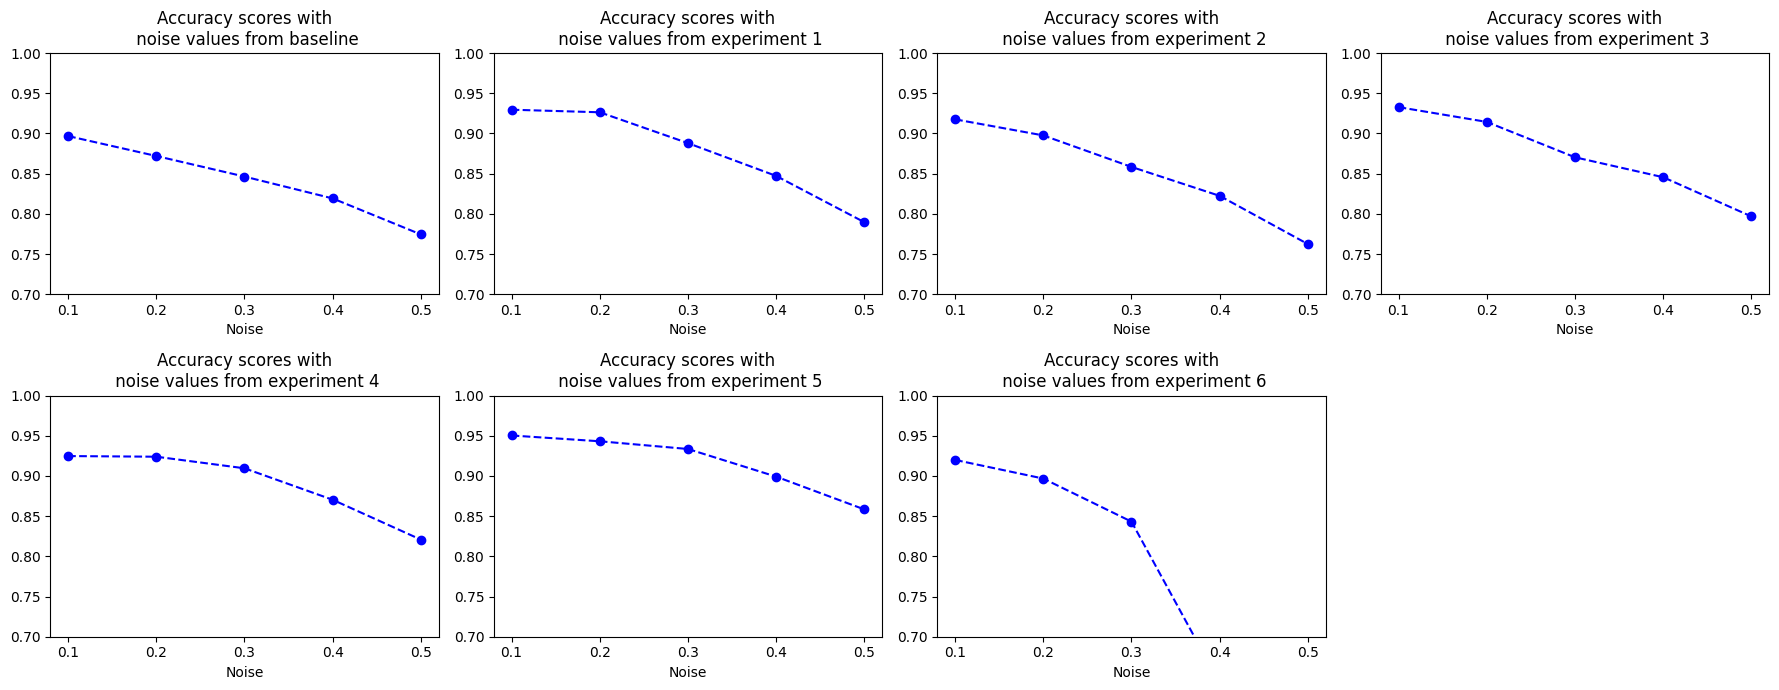

In [243]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(7):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in noises], scores_noisy_svm[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n noise values from experiment {i}" if i > 0 else "Accuracy scores with\n noise values from baseline")
    ax[k][j].set_ylim([.7, 1.])
    ax[k][j].set_xlabel("Noise") 
fig.tight_layout()
fig.delaxes(ax[1,3])

### Testing with CNN - Baseline

In [289]:
cnn_scores_noise = []

In [256]:
from tensorflow import keras
from tensorflow.keras import layers

In [278]:
noisy_mnists_pixelshape = [np.expand_dims(data, -1) for data in noisy_mnists]
input_shape = noisy_mnists_pixelshape[0][0].shape[-3:]
classes = np.unique(labels_train).shape[0]
labels_binary = keras.utils.to_categorical(labels_train, classes)
transformed_baseline_dataset = [train_test_split(noisy_mnist_data, 
                                                labels_binary,
                                                test_size=0.25,
                                                random_state=0) for noisy_mnist_data in noisy_mnists_pixelshape]

In [308]:
def make_model_baseline(input_shape, num_classes):
    return keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

def score_cnn(clfs, dataset):
    scores = []
    batch_size = 128
    epochs = 15
    for noise_i, clf in enumerate(clfs):
        clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        clf.fit(dataset[noise_i][0], dataset[noise_i][2], batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
        scores.append(clf.evaluate(dataset[noise_i][1], dataset[noise_i][3], verbose=0)[1])
    return scores

In [292]:
clfs_bl_cnn = [make_model_baseline(input_shape=input_shape, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_bl_cnn, transformed_baseline_dataset))

#### CNN - Experiment 1

In [315]:
### Prepare transformed dataset for CNN
def prepare_dataset(dataset):
    return_dataset = []
    for noise_level_dataset in dataset:
        x_tr = np.expand_dims(noise_level_dataset[0], -1)
        y_tr = labels_binary = keras.utils.to_categorical(noise_level_dataset[2], classes)
        x_te = np.expand_dims(noise_level_dataset[1], -1)
        y_te = labels_binary = keras.utils.to_categorical(noise_level_dataset[3], classes)
        return_dataset.append((x_tr, x_te, y_tr, y_te))
    return return_dataset

In [316]:
def make_model_1d_conv(input_shape, num_classes):
    return keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv1D(32, kernel_size=3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [317]:
dataset_exp1_cnn = prepare_dataset(dataset_exp1)
input_shape_exp1 = dataset_exp1_cnn[0][0].shape[-2:]
clfs_exp1_cnn = [make_model_1d_conv(input_shape=input_shape_exp1, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_exp1_cnn, dataset_exp1_cnn))

### CNN - Experiment 2

In [319]:
dataset_exp2_cnn = prepare_dataset(dataset_exp2)
input_shape_exp2 = dataset_exp2_cnn[0][0].shape[-2:]
clfs_exp2_cnn = [make_model_1d_conv(input_shape=input_shape_exp2, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_exp2_cnn, dataset_exp2_cnn))

### CNN - Experiment 3

In [320]:
dataset_exp3_cnn = prepare_dataset(dataset_exp3)
input_shape_exp3 = dataset_exp3_cnn[0][0].shape[-2:]
clfs_exp3_cnn = [make_model_1d_conv(input_shape=input_shape_exp3, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_exp3_cnn, dataset_exp3_cnn))

### CNN - Experiment 4

In [321]:
dataset_exp4_cnn = prepare_dataset(dataset_exp4)
input_shape_exp4 = dataset_exp4_cnn[0][0].shape[-2:]
clfs_exp4_cnn = [make_model_1d_conv(input_shape=input_shape_exp4, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_exp4_cnn, dataset_exp4_cnn))

### CNN - Experiment 5

In [322]:
dataset_exp3_cnn = prepare_dataset(dataset_exp3)
input_shape_exp3 = dataset_exp3_cnn[0][0].shape[-2:]
clfs_exp3_cnn = [make_model_1d_conv(input_shape=input_shape_exp3, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_exp3_cnn, dataset_exp3_cnn))

### CNN - Experiment 6

In [323]:
dataset_exp3_cnn = prepare_dataset(dataset_exp3)
input_shape_exp3 = dataset_exp3_cnn[0][0].shape[-2:]
clfs_exp3_cnn = [make_model_1d_conv(input_shape=input_shape_exp3, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_exp3_cnn, dataset_exp3_cnn))

### Results - CNN

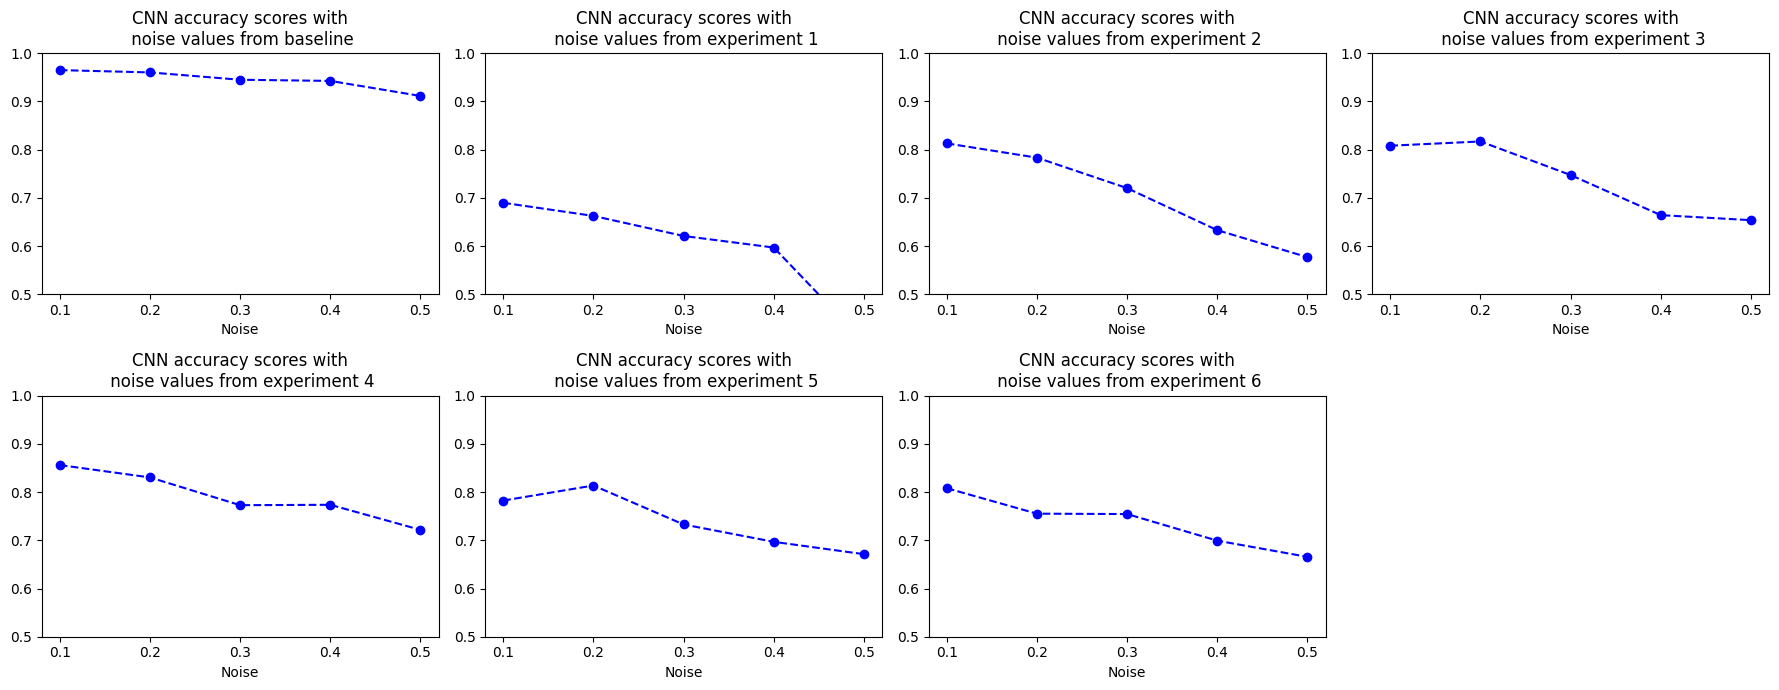

In [325]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(7):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in noises], cnn_scores_noise[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"CNN accuracy scores with\n noise values from experiment {i}" if i > 0 else "CNN accuracy scores with\n noise values from baseline")
    ax[k][j].set_ylim([.5, 1.])
    ax[k][j].set_xlabel("Noise") 
fig.tight_layout()
fig.delaxes(ax[1,3])

## Another type of noise: image blackouts

In [164]:
def black_out_section(image, size):
    offset = 28 - size
    start_row = np.random.randint(3, offset-3)
    start_col = np.random.randint(3, offset-3)
    image_copy = image.copy()
    image_copy[start_row:start_row+size, start_col:start_col+size] = 0
    return image_copy

blackout_sizes = np.arange(3, 18, 3)
blackout_mnists = [np.array([black_out_section(img, size) for img in mnist_copy]) for size in blackout_sizes]

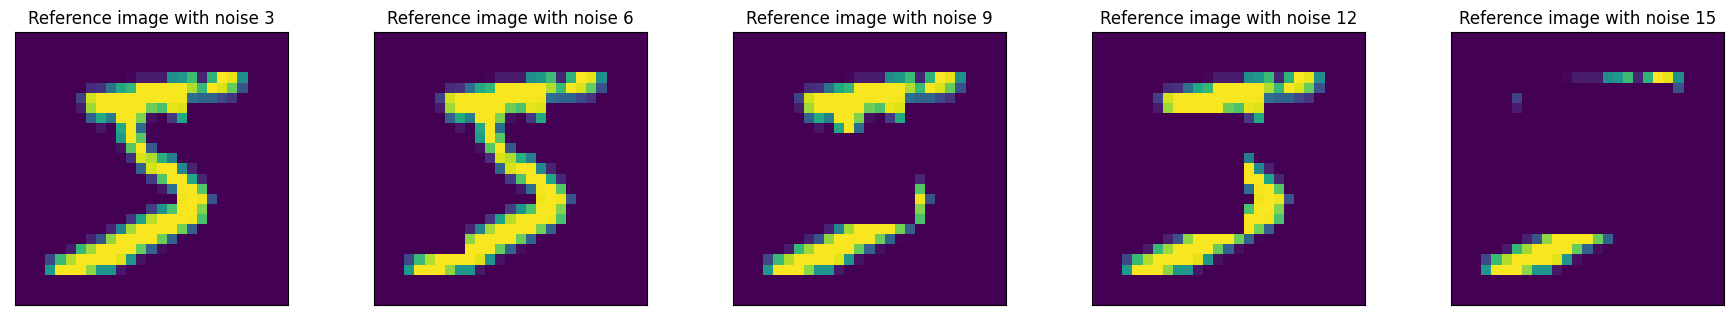

In [171]:
fig, ax = plt.subplots(1, 5, figsize=(18, 3))
for i in range(5): 
    ax[i].imshow(blackout_mnists[i][0])
    ax[i].set_xticks(())
    ax[i].set_yticks(())
    ax[i].set_title(f"Reference image with noise {blackout_sizes[i]}")
plt.tight_layout(pad=0.0)

### LR

In [172]:
scores_blackout_lr = []

### Baseline

In [177]:
blackout_mnists_flattened = [data.reshape(TRAIN_SIZE, 27*27) for data in blackout_mnists]
transformed_flat_dataset_blackout = [train_test_split(data, 
                                                      labels_train,
                                                      test_size=0.25,
                                                      random_state=0) for data in blackout_mnists_flattened]

In [178]:

clfs_bl_lr = [LogisticRegression(fit_intercept=True,
                                 multi_class='multinomial',
                                 penalty='l2',
                                 solver='saga',
                                 max_iter=1000,
                                 n_jobs=8,
                                 tol=lr_best_tols["baseline"]) for _ in range(len(blackout_sizes))]

scores_blackout_lr.append(score_clfs_noisy(clfs_bl_lr, transformed_flat_dataset_blackout))

#### Experiment 1

In [179]:
dataset_exp1_blackout = [train_test_split(experiment1(data), 
                                          labels_train,
                                          test_size=0.25,
                                          random_state=0) for data in blackout_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [180]:
clfs_lr_ex1_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp1"]) for _ in range(len(blackout_sizes))]
                        
scores_blackout_lr.append(score_clfs_noisy(clfs_lr_ex1_blackout, dataset_exp1_blackout))

#### Experiment 2

In [181]:
dataset_exp2_blackout = [train_test_split(experiment2(data), 
                                          labels_train,
                                          test_size=0.25,
                                          random_state=0) for data in blackout_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [182]:
clfs_lr_ex2_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp2"]) for _ in range(len(blackout_sizes))]
                        
scores_blackout_lr.append(score_clfs_noisy(clfs_lr_ex2_blackout, dataset_exp2_blackout))

#### Experiment 3

In [183]:
dataset_exp3_blackout = [train_test_split(experiment3(data), 
                                          labels_train,
                                          test_size=0.25,
                                          random_state=0) for data in blackout_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [184]:
clfs_lr_ex3_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp3"]) for _ in range(len(blackout_sizes))]
                        
scores_blackout_lr.append(score_clfs_noisy(clfs_lr_ex3_blackout, dataset_exp3_blackout))

#### Experiment 4

In [185]:
dataset_exp4_blackout = [train_test_split(experiment4(data), 
                                          labels_train,
                                          test_size=0.25,
                                          random_state=0) for data in blackout_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [186]:
clfs_lr_ex4_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp4"]) for _ in range(len(blackout_sizes))]
                        
scores_blackout_lr.append(score_clfs_noisy(clfs_lr_ex4_blackout, dataset_exp4_blackout))

#### Experiment 5

In [244]:
dataset_exp5_blackout = [train_test_split(experiment4(data, length=4), 
                                          labels_train,
                                          test_size=0.25,
                                          random_state=0) for data in blackout_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [245]:
clfs_lr_ex5_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp5"]) for _ in range(len(blackout_sizes))]
                        
scores_blackout_lr.append(score_clfs_noisy(clfs_lr_ex5_blackout, dataset_exp5_blackout))

#### Experiment 6

In [246]:
dataset_exp6_blackout = [train_test_split(experiment6(data, threshhold=0.85), 
                                          labels_train,
                                          test_size=0.25,
                                          random_state=0) for data in blackout_mnists]

/Users/dherik/git/master-eksperiment/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [247]:
clfs_lr_ex6_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp6"]) for _ in range(len(blackout_sizes))]
                        
scores_blackout_lr.append(score_clfs_noisy(clfs_lr_ex6_blackout, dataset_exp6_blackout))

### Results - Blackout - LR

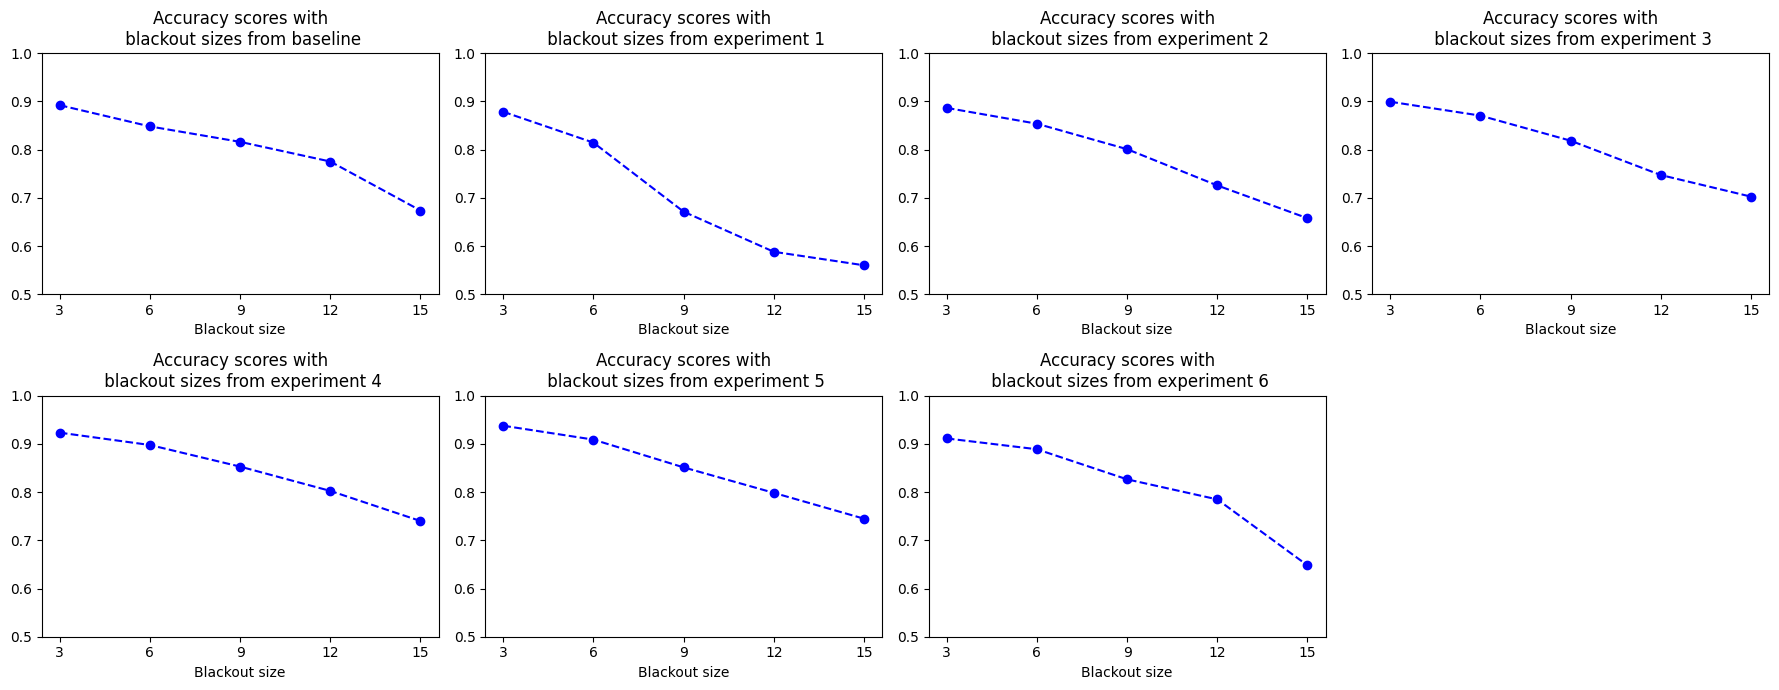

In [254]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(7):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in blackout_sizes], scores_blackout_lr[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n blackout sizes from experiment {i}" if i > 0 else "Accuracy scores with\n blackout sizes from baseline")
    ax[k][j].set_ylim([.5, 1.])
    ax[k][j].set_xlabel("Blackout size") 
fig.tight_layout()
fig.delaxes(ax[1,3])

### SVM

In [190]:
scores_blackout_svm = []

#### Baseline - SVM

In [191]:
clfs_svm_blackout_bl = [SVC(kernel='rbf', C=svm_best_Cs["baseline"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_blackout_bl, transformed_flat_dataset_blackout))

#### Experiment 1 - SVM

In [192]:
clfs_svm_exp1_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp1"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_exp1_blackout, dataset_exp1_blackout))

#### Experiment 2 - SVM

In [193]:
clfs_svm_exp2_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp2"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_exp2_blackout, dataset_exp2_blackout))

#### Experiment 3 - SVM

In [194]:
clfs_svm_exp3_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp3"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_exp3_blackout, dataset_exp3_blackout))

#### Experiment 4 - SVM

In [195]:
clfs_svm_exp4_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp4"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_exp4_blackout, dataset_exp4_blackout))

#### Experiment 5 - SVM

In [252]:
clfs_svm_exp5_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp5"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_exp5_blackout, dataset_exp5_blackout))

#### Experiment 6 - SVM

In [253]:
clfs_svm_exp6_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp6"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_exp6_blackout, dataset_exp6_blackout))

### Results - SVM

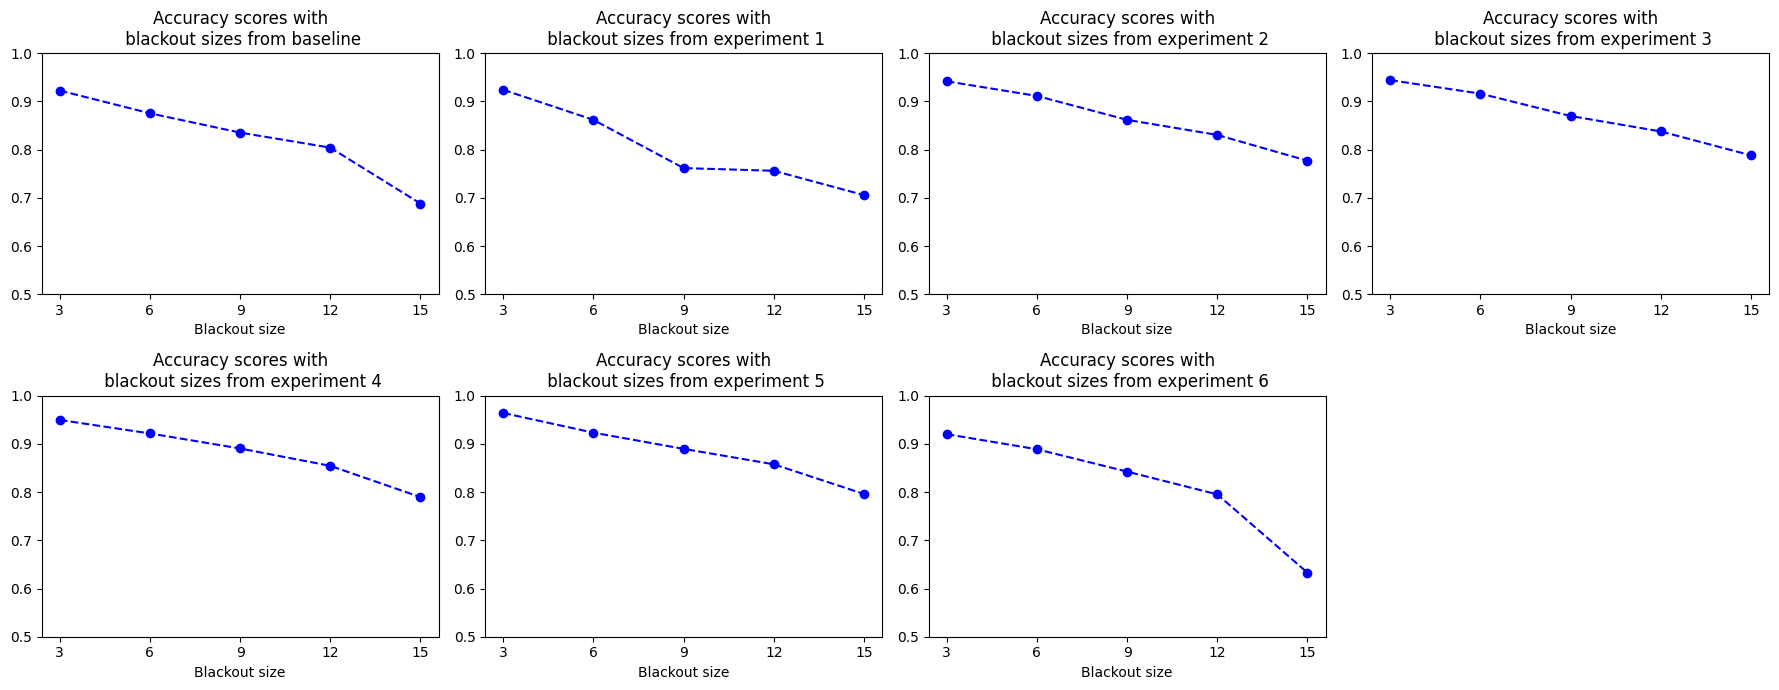

In [255]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(7):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in blackout_sizes], scores_blackout_svm[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n blackout sizes from experiment {i}" if i > 0 else "Accuracy scores with\n blackout sizes from baseline")
    ax[k][j].set_ylim([.5, 1.])
    ax[k][j].set_xlabel("Blackout size") 
fig.tight_layout()
fig.delaxes(ax[1,3])

### Testing with CNN - Baseline

In [326]:
cnn_blackout_scores_noise = []

In [331]:
blackout_mnists_pixelshape = [np.expand_dims(data, -1) for data in blackout_mnists]
input_shape_blackout_bl = blackout_mnists_pixelshape[0][0].shape[-3:]
labels_binary_blackout = keras.utils.to_categorical(labels_train, classes)
transformed_baseline_dataset_blackout = [train_test_split(data_b, 
                                                          labels_binary_blackout,
                                                          test_size=0.25,
                                                          random_state=0) for data_b in blackout_mnists_pixelshape]

In [332]:
clfs_blackout_bl_cnn = [make_model_baseline(input_shape=input_shape, num_classes=classes) for _ in range(len(noises))]
cnn_blackout_scores_noise.append(score_cnn(clfs_blackout_bl_cnn, transformed_baseline_dataset_blackout))

### CNN - Experiment 1

In [333]:
dataset_blackout_exp1_cnn = prepare_dataset(dataset_exp1_blackout)
input_shape_exp1_blackout = dataset_blackout_exp1_cnn[0][0].shape[-2:]
clfs_exp1_cnn_blackout = [make_model_1d_conv(input_shape=input_shape_exp1_blackout, num_classes=classes) for _ in range(len(noises))]
cnn_blackout_scores_noise.append(score_cnn(clfs_exp1_cnn_blackout, dataset_blackout_exp1_cnn))

### CNN - Experiment 2

In [334]:
dataset_blackout_exp2_cnn = prepare_dataset(dataset_exp2_blackout)
input_shape_exp2_blackout = dataset_blackout_exp2_cnn[0][0].shape[-2:]
clfs_exp2_cnn_blackout = [make_model_1d_conv(input_shape=input_shape_exp2_blackout, num_classes=classes) for _ in range(len(noises))]
cnn_blackout_scores_noise.append(score_cnn(clfs_exp2_cnn_blackout, dataset_blackout_exp2_cnn))

### CNN - Experiment 3

In [335]:
dataset_blackout_exp3_cnn = prepare_dataset(dataset_exp3_blackout)
input_shape_exp3_blackout = dataset_blackout_exp3_cnn[0][0].shape[-2:]
clfs_exp3_cnn_blackout = [make_model_1d_conv(input_shape=input_shape_exp3_blackout, num_classes=classes) for _ in range(len(noises))]
cnn_blackout_scores_noise.append(score_cnn(clfs_exp3_cnn_blackout, dataset_blackout_exp3_cnn))

### CNN - Experiment 4

In [336]:
dataset_blackout_exp4_cnn = prepare_dataset(dataset_exp4_blackout)
input_shape_exp4_blackout = dataset_blackout_exp4_cnn[0][0].shape[-2:]
clfs_exp4_cnn_blackout = [make_model_1d_conv(input_shape=input_shape_exp4_blackout, num_classes=classes) for _ in range(len(noises))]
cnn_blackout_scores_noise.append(score_cnn(clfs_exp4_cnn_blackout, dataset_blackout_exp4_cnn))

### CNN - Experiment 5

In [337]:
dataset_blackout_exp5_cnn = prepare_dataset(dataset_exp5_blackout)
input_shape_exp5_blackout = dataset_blackout_exp5_cnn[0][0].shape[-2:]
clfs_exp5_cnn_blackout = [make_model_1d_conv(input_shape=input_shape_exp5_blackout, num_classes=classes) for _ in range(len(noises))]
cnn_blackout_scores_noise.append(score_cnn(clfs_exp5_cnn_blackout, dataset_blackout_exp5_cnn))

### CNN - Experiment 6

In [338]:
dataset_blackout_exp6_cnn = prepare_dataset(dataset_exp6_blackout)
input_shape_exp6_blackout = dataset_blackout_exp6_cnn[0][0].shape[-2:]
clfs_exp6_cnn_blackout = [make_model_1d_conv(input_shape=input_shape_exp6_blackout, num_classes=classes) for _ in range(len(noises))]
cnn_blackout_scores_noise.append(score_cnn(clfs_exp6_cnn_blackout, dataset_blackout_exp6_cnn))

### CNN - Blackout - Results

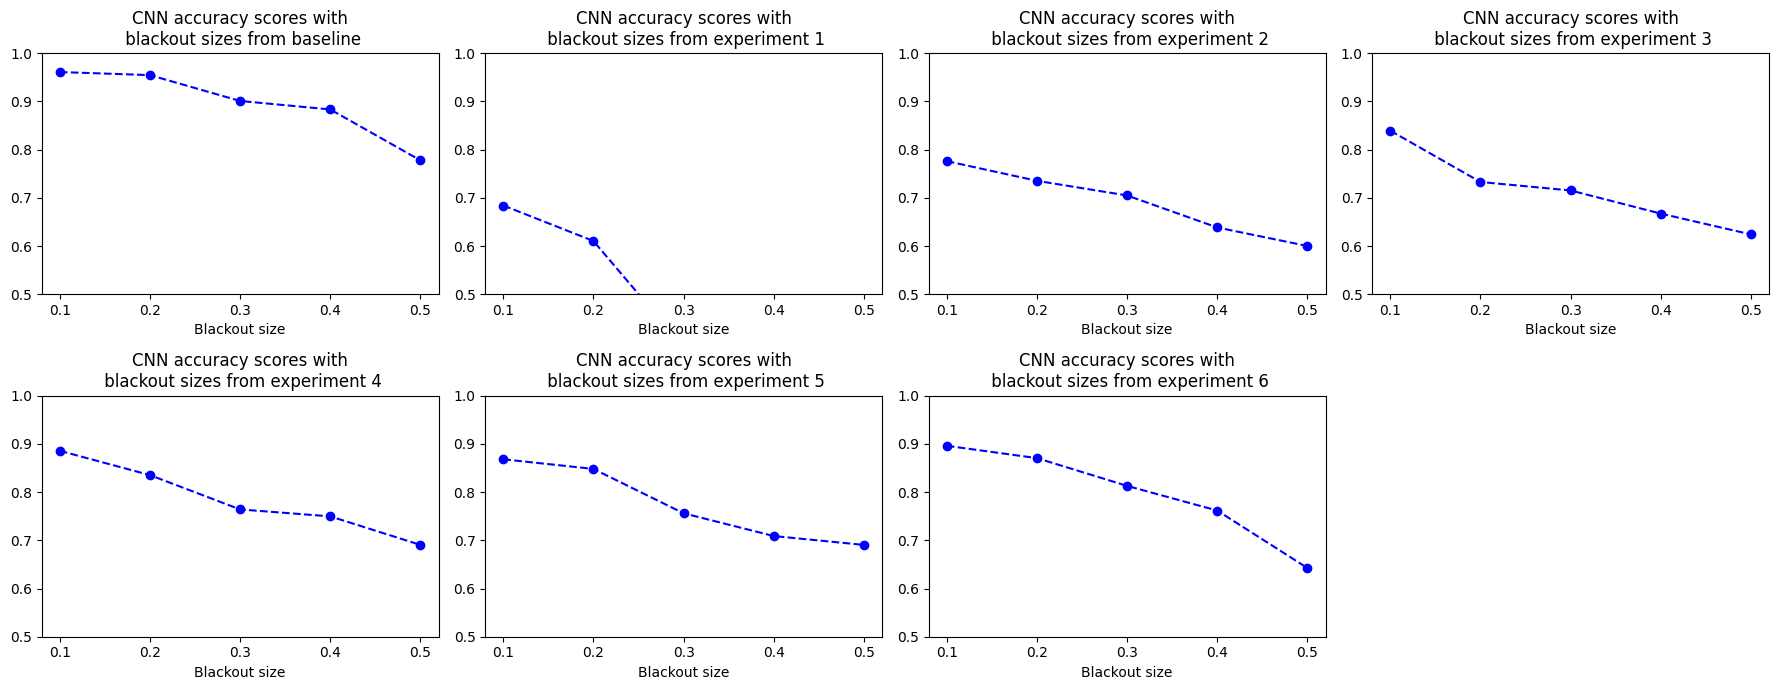

In [340]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(7):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in noises], cnn_blackout_scores_noise[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"CNN accuracy scores with\n blackout sizes from experiment {i}" if i > 0 else "CNN accuracy scores with\n blackout sizes from baseline")
    ax[k][j].set_ylim([.5, 1.])
    ax[k][j].set_xlabel("Blackout size") 
fig.tight_layout()
fig.delaxes(ax[1,3])